In [1]:
import warnings
warnings.filterwarnings("ignore")

Create Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, json
from sklearn.model_selection import train_test_split

In [3]:
first_df=pd.read_csv('Arrests_cleaned.csv')
r = requests.get('https://data.cityofchicago.org/resource/crimes.json?$limit=600000')
data = r.json()
sec_df = pd.DataFrame(data)
sec_df = sec_df[['case_number','ward','district']]

In [4]:
merged_df = pd.merge(first_df, sec_df, on="case_number")
print(len(merged_df))
merged_df.head(1)

67647


,id,case_number,date_month,date_day,date_year,time,meridiem,race,charge_1_statute,charge_1_description,...,charge_4_statute,charge_4_description,charge_4_type,charge_4_class,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS,ward,district
0,30039812,JE183770,3,30,2021,12:10:00,AM,WHITE HISPANIC,720 ILCS 5.0/12-3.2-A-1,DOMESTIC BATTERY - BODILY HARM,...,NaN,NaN,NaN,NaN,720 ILCS 5.0/12-3.2-A-1 | | |,DOMESTIC BATTERY - BODILY HARM | | |,M | | |,A | | |,14,008


In [5]:
races = merged_df.loc[:, "race"].unique().tolist()
race_dummies = pd.get_dummies(merged_df, columns=["race"])
races = ["race_"+r for r in races]
race_dummies = race_dummies[races]
race_dummies

,race_WHITE HISPANIC,race_BLACK,race_BLACK HISPANIC,race_WHITE,race_ASIAN / PACIFIC ISLANDER,race_AMER INDIAN / ALASKAN NATIVE,race_UNKNOWN / REFUSED
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
67642,0,0,1,0,0,0,0
67643,0,1,0,0,0,0,0
67644,0,1,0,0,0,0,0
67645,1,0,0,0,0,0,0


In [6]:
merged_df = merged_df[['ward','district','date_day','date_year','charge_1_type']]
# merged_df['ward'] = pd.to_numeric(merged_df['ward'])
# merged_df['district'] = pd.to_numeric(merged_df['district'])

merged_df = pd.concat([merged_df, race_dummies], axis=1).dropna()

In [49]:
merged_df

,ward,district,date_day,date_year,charge_1_type,race_WHITE HISPANIC,race_BLACK,race_BLACK HISPANIC,race_WHITE,race_ASIAN / PACIFIC ISLANDER,race_AMER INDIAN / ALASKAN NATIVE,race_UNKNOWN / REFUSED
0,14,008,30,2021,M,1,0,0,0,0,0,0
1,22,010,23,2021,M,0,1,0,0,0,0,0
2,7,004,16,2021,F,0,1,0,0,0,0,0
3,24,011,16,2021,F,0,1,0,0,0,0,0
4,13,008,16,2021,M,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68411,22,010,7,2022,F,0,0,1,0,0,0,0
68412,34,022,7,2022,M,0,1,0,0,0,0,0
68413,9,005,7,2022,F,0,1,0,0,0,0,0
68414,7,003,7,2022,F,1,0,0,0,0,0,0


In [7]:
x = merged_df[['race_WHITE HISPANIC','race_BLACK','race_BLACK HISPANIC','race_WHITE','race_ASIAN / PACIFIC ISLANDER','race_AMER INDIAN / ALASKAN NATIVE', \
    'race_UNKNOWN / REFUSED','ward','district','date_day','date_year']]
y = merged_df[['charge_1_type']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

KNN

In [8]:
from sklearn.model_selection import GridSearchCV
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [52]:
knn = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(3, 10, 2)],'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':[i for i in range(20, 40, 5)]}
clf = GridSearchCV(knn, params, cv=5)
clf.fit(x_train,y_train)
print(clf.best_estimator_)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)


In [53]:
clf.best_score_

0.5679201799406146

In [54]:
scalers = [MinMaxScaler(), StandardScaler(), PCA()]
for index, scaling in enumerate(scalers):
    pipe = make_pipeline(scaling, clf.best_estimator_)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(scalers[index], "score = ", accuracy_score(y_pred, y_test))

MinMaxScaler() score =  0.5628563075573747
StandardScaler() score =  0.5634410173951176
PCA() score =  0.5711884227452126


In [55]:
clf.best_estimator_.fit(x_train,y_train)
y_pred = clf.best_estimator_.predict(x_test)
print("No scaling score = ", accuracy_score(y_pred, y_test))

No scaling score =  0.565633679286654


Neural Networks

In [9]:
from statistics import mean 

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [57]:
net_classifier = MLPClassifier()
net_classifier.fit(x_train,y_train['charge_1_type'].tolist())
classifier_preds = net_classifier.predict(x_test)
score = net_classifier.score(x_test,y_test)
print(score)

0.5112556643765531


In [58]:
scalers = [MinMaxScaler(), StandardScaler(), PCA()]
scores = []
for scaling in scalers:
    pipe = make_pipeline(scaling, net_classifier)
    pipe.fit(x_train,y_train['charge_1_type'].tolist())
    scores.append(pipe.score(x_test,y_test))

print("MinMaxScore =",scores[0])
print("StandardScaler =",scores[1])
print("PCA =",scores[2])

MinMaxScore = 0.5774009647712323
StandardScaler = 0.5788627393655899
PCA = 0.5800321590410759


In [59]:
parameters = {
    # 'solver': ['lbfgs', 'sgd', 'adam'],
    # 'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    # 'alpha' : [0.001, 0.01,0.0001,0.002,0.003],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.001,0.002,0.0011,0.0009],
    'random_state':[0,100,200,300,400],
}

search = GridSearchCV(net_classifier,parameters)
search.fit(x_train,y_train['charge_1_type'].tolist())

best = search.best_estimator_
best_score = best.score(x_test,y_test)
print(best_score)

0.5097208010524777


In [60]:
scores = []
for scaling in scalers:
    pipe = make_pipeline(scaling, best)
    pipe.fit(x_train,y_train['charge_1_type'].tolist())
    scores.append(pipe.score(x_test,y_test))

print("MinMaxScore =",scores[0])
print("StandardScaler =",scores[1])
print("PCA =",scores[2])

MinMaxScore = 0.575793012717439
StandardScaler = 0.5742581493933635
PCA = 0.5728694635287239


Random Forest

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
# creating a Random Forest classifier
clf_m = RandomForestClassifier(n_estimators = 100,random_state=0)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_m.fit(x_train, y_train)
scores_RF = cross_val_score(clf_m, x_train,y_train, cv=5)

In [13]:
#n_estimators max_depth min_samples_leaf min_samples_split max_features
parameters = {'max_depth':[i for i in range(6, 17,2)],'min_samples_leaf':[i for i in range(9, 15)]}
clf_mCV = GridSearchCV(clf_m, parameters,cv=5)
clf_mCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [9, 10, 11, 12, 13, 14]})

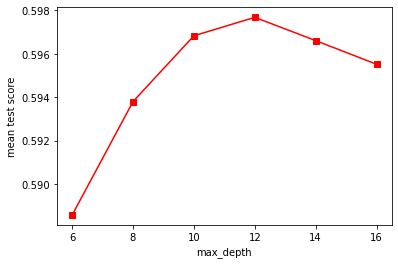

In [14]:
x = [i for i in range(6,17,2)]
k1 = clf_mCV.cv_results_['mean_test_score'][3::6]
plt.plot(x,k1,'s-',color = 'r')
plt.xlabel("max_depth")
plt.ylabel("mean test score")
plt.show()

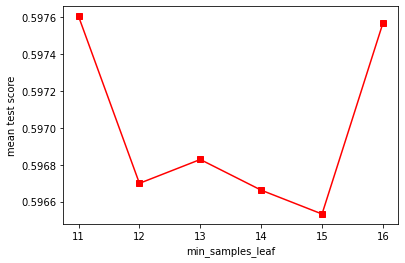

In [15]:
x = [i for i in range(11,17)]
k1 = clf_mCV.cv_results_['mean_test_score'][13:19]
plt.plot(x,k1,'s-',color = 'r')
plt.xlabel("min_samples_leaf")
plt.ylabel("mean test score")
plt.show()

In [16]:
clf_m = RandomForestClassifier(n_estimators = 100,max_depth=12,min_samples_leaf=11,random_state=0)
parameters = {'max_features':[i for i in range(4, 9)],'min_samples_split':[i for i in range(33,39)]}
clf_mCV = GridSearchCV(clf_m, parameters,cv=5)
clf_mCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12, min_samples_leaf=11,
                                              random_state=0),
             param_grid={'max_features': [4, 5, 6, 7, 8],
                         'min_samples_split': [33, 34, 35, 36, 37, 38]})

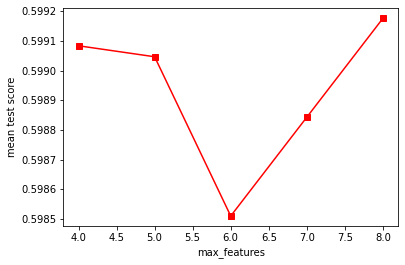

In [17]:
x = [i for i in range(4, 9)]
k1 = clf_mCV.cv_results_['mean_test_score'][3::6]
plt.plot(x,k1,'s-',color = 'r')
plt.xlabel("max_features")
plt.ylabel("mean test score")
plt.show()

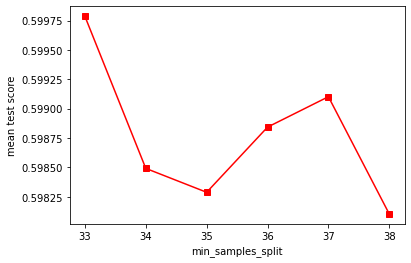

In [18]:
x = [i for i in range(33,39)]
k1 = clf_mCV.cv_results_['mean_test_score'][18:24]
plt.plot(x,k1,'s-',color = 'r')
plt.xlabel("min_samples_split")
plt.ylabel("mean test score")
plt.show()

In [19]:
clf_m = RandomForestClassifier(n_estimators = 100,max_depth=12,min_samples_leaf=16,random_state=0,max_features=8,min_samples_split=33)
clf_m.fit(x_train, y_train)
scores_RF = cross_val_score(clf_m, x_train,y_train, cv=5)
scores_RF.mean()

0.5983995680704417

In [20]:
# performing predictions on the test dataset
y_pred_m = clf_m.predict(x_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred_m))

ACCURACY OF THE MODEL:  0.6016410408042578


Gradient Boosting

In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [43]:
merged_df = merged_df.infer_objects()

x = merged_df[['race_WHITE HISPANIC','race_BLACK','race_BLACK HISPANIC','race_WHITE','race_ASIAN / PACIFIC ISLANDER','race_AMER INDIAN / ALASKAN NATIVE', \
    'race_UNKNOWN / REFUSED','ward','district','date_day','date_year']]
y = merged_df[['charge_1_type']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [44]:
# training
xgb_clf_m = XGBClassifier()
xgb_clf_m.fit(x_train, y_train)

# testing
score_m = xgb_clf_m.score(x_test, y_test)
print("accuracy score: ", score_m)

accuracy score:  0.0


In [45]:
scalers = [MinMaxScaler(), StandardScaler(), PCA()]
for index, scaling in enumerate(scalers):
    pipe = make_pipeline(scaling, XGBClassifier())
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(scalers[index], "score = ", accuracy_score(y_pred, y_test))

MinMaxScaler() score =  0.0
StandardScaler() score =  0.0
PCA() score =  0.0


In [ ]:
# training
light_clf = HistGradientBoostingClassifier()
light_clf.fit(x_train, y_train)

# testing
score_light = light_clf.score(x_test, y_test)
print("accuracy score: ", score_light)

In [ ]:
for index, scaling in enumerate(scalers):
    pipe = make_pipeline(scaling, HistGradientBoostingClassifier())
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    print(scalers[index], "score = ", accuracy_score(y_pred, y_test))

In [ ]:
hist_params = {"max_iter": [100, 150, 200], "max_leaf_nodes": [31, None], "max_depth": [9, None], "l2_regularization": [0, 0.001, 0.1]}
hist_clf = HistGradientBoostingClassifier()
hist_clf_cv = GridSearchCV(hist_clf, scoring='accuracy', cv=5, param_grid=hist_params)
hist_clf_cv.fit(x_train, y_train)
print("best accuracy: ", hist_clf_cv.best_score_)
print("best parameters: ", hist_clf_cv.best_params_)
print(hist_clf_cv.score(x_test, y_test))

In [ ]:
# Plot
dims = list(range(1, 14))
acc_scores = []
for dim in dims:
    # PCA
    pca_project = PCA(n_components=dim)
    trans_s_data = pca_project.fit_transform(x_train)

    # CV
    hist_params = {'l2_regularization': [0.001], 'max_depth': [None], 'max_iter': [100], 'max_leaf_nodes': [31]}
    hist_clf = HistGradientBoostingClassifier()
    hist_clf_cv = GridSearchCV(hist_clf, scoring='accuracy', cv=5, param_grid=hist_params)
    hist_clf_cv.fit(trans_s_data, y_train)
    acc_scores.append(hist_clf_cv.best_score_)
    print("dim = ", dim, " accuracy score: ", hist_clf_cv.best_score_)

In [ ]:
plt.plot(dims, acc_scores)
plt.axvline(x = 4, color = 'purple', label = 'axvline - full height', linestyle=":")
plt.axvline(x = 12, color = 'purple', label = 'axvline - full height', linestyle=":")
plt.xlabel("dimension")
plt.ylabel("accuracy score")
plt.title("Explore Reduced Dimensions by Knee Method")
plt.show()

Ensemble Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier, ExtraTreesClassifier

In [ ]:
y_bool_train = [i == "M" for i in y_train['charge_1_type']]
y_bool_test = [i == "M" for i in y_test['charge_1_type']]

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')
decision_tree_model.fit(x_train, y_bool_train)
y_pred = decision_tree_model.predict(x_test)
cv_results = cross_validate(decision_tree_model, x_train, y_bool_train)
cv_results

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')
best_depth = []
best_min_samples = []
best_nodes = [] 

for i in range(1,21):
    decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)
    decision_tree_model.fit(x_train, y_bool_train)
    y_pred = decision_tree_model.predict(x_train)
    cv_results = cross_validate(decision_tree_model, x_train, y_bool_train)
    score = np.mean(cv_results['test_score'])
    best_min_samples.append(score)

In [ ]:
x = list(range(20))
best_min_samples 

print(best_min_samples.index(max(best_min_samples)))
plt.plot(x, best_min_samples)

In [ ]:
for i in range(20,200,5):
    decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth = 7, max_leaf_nodes=i)
    decision_tree_model.fit(x_train, y_bool_train)
    y_pred = decision_tree_model.predict(x_train)
    cv_results = cross_validate(decision_tree_model, x_train, y_bool_train)
    score = np.mean(cv_results['test_score'])
    best_nodes.append(score)
print(best_nodes.index(max(best_nodes)))

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth = 7, max_leaf_nodes=70)
decision_tree_model.fit(x_train, y_bool_train)
y_pred = decision_tree_model.predict(x_train)
cv_results = cross_validate(decision_tree_model, x_train, y_bool_train)
score = np.mean(cv_results['test_score'])
score

In [ ]:
clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth = 7,max_leaf_nodes=70))
clf.fit(x_train, y_bool_train)
cv_results = cross_validate(clf, x_train, y_bool_train)
cv_results

In [ ]:
clf = []
for i in range(10):
    clf.append(DecisionTreeClassifier(criterion='entropy', max_depth = 7,max_leaf_nodes=70,max_features='sqrt'))
eclf1 = VotingClassifier(estimators=[('clf1', clf[0]), 
                                     ('clf2', clf[1]), 
                                     ('clf3', clf[2]), 
                                     ('clf4', clf[3]), 
                                     ('clf5', clf[4]), 
                                     ('clf6', clf[5]), 
                                     ('clf7', clf[6]), 
                                     ('clf8', clf[7]), 
                                     ('clf9', clf[8]), 
                                     ('clf10', clf[9])], voting='hard')
eclf1 = eclf1.fit(x_train, y_bool_train)
cv_results = cross_validate(eclf1, x_train, y_bool_train)
cv_results

In [ ]:
aclf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth = 7,max_leaf_nodes=70,max_features='sqrt'))
aclf.fit(x_train,y_bool_train)
aclf.score(x_test,y_bool_test)

In [ ]:
rclf = RandomForestClassifier()
rclf.fit(x_train,y_bool_train)
rclf.score(x_test,y_bool_test)

In [ ]:
eclf = ExtraTreesClassifier()
eclf.fit(x_train,y_bool_train)
eclf.score(x_test,y_bool_test)

In [ ]:
hclf = HistGradientBoostingClassifier()
hclf.fit(x_train,y_bool_train)
hclf.score(x_test,y_bool_test)

In [ ]:
estimators = [('dt', DecisionTreeClassifier(criterion='entropy', max_depth = 7,max_leaf_nodes=70,max_features='sqrt')),('rf',RandomForestClassifier())]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(x_train,y_bool_train)
sclf.score(x_test,y_bool_test)